## **<font color = blue> 참조 : https://dacon.io/competitions/official/235689/codeshare/2290 </font>**# **데이터 불러오기**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/월간 11 운동')

In [1]:
import pandas as pd
import numpy as np

train=pd.read_csv('data/train_features.csv')
train_labels=pd.read_csv('data/train_labels.csv')
test=pd.read_csv('data/test_features.csv')
submission=pd.read_csv('data/sample_submission.csv')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


In [5]:
all_df = pd.concat([train,test])

In [8]:
#float변수찾기
float_col = []
for col in all_df.columns:
    if all_df[col].dtype == 'float64':
        float_col.append(col)
# float_col.remove('id')
# float_col.remove('time')
float_df = all_df[float_col]

In [9]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(float_df)
float_scaled = scaler.transform(float_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
float_df_scaled = pd.DataFrame(data=float_scaled, columns=float_df.columns)
print('feature들의 최소 값')
print(float_df_scaled.min())
print('\nfeature들의 최대 값')
print(float_df_scaled.max())

feature들의 최소 값
acc_x    0.0
acc_y    0.0
acc_z    0.0
gy_x     0.0
gy_y     0.0
gy_z     0.0
dtype: float64

feature들의 최대 값
acc_x    1.0
acc_y    1.0
acc_z    1.0
gy_x     1.0
gy_y     1.0
gy_z     1.0
dtype: float64


In [11]:
float_df
train = float_df.iloc[:len(train),:]
test = float_df.iloc[len(train):,:]

In [12]:
train.isnull().sum()

acc_x    0
acc_y    0
acc_z    0
gy_x     0
gy_y     0
gy_z     0
dtype: int64

In [13]:
def dist_XY(id,df):
    XY_list = []
    tm = df[df['id'] == id]
    for i in range(len(tm)-1):
        XY_list.append(np.sqrt((tm.iloc[i,2] - tm.iloc[i+1,2])**2 + (tm.iloc[i,3] - tm.iloc[i+1,3])**2))
    return XY_list
def dist_XZ(id,df):
    XY_list = []
    tm = df[df['id'] == id]
    for i in range(len(tm)):
        XY_list.append(np.sqrt((tm.iloc[i,2])**2 + (tm.iloc[i,4])**2))
    return XY_list

In [14]:
id_0_XY_dist = dist_XY(0,train)

KeyError: 'id'

In [ ]:
sns.distplot(id_0_XY_dist)

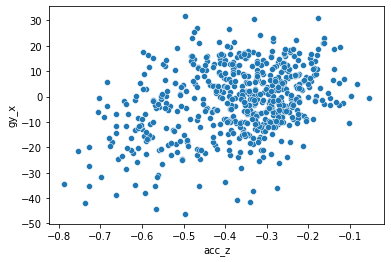

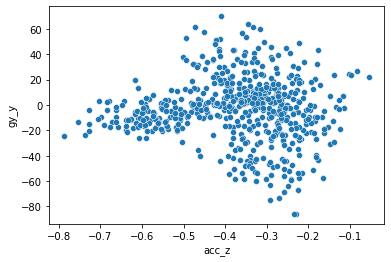

<AxesSubplot:xlabel='gy_x', ylabel='gy_y'>

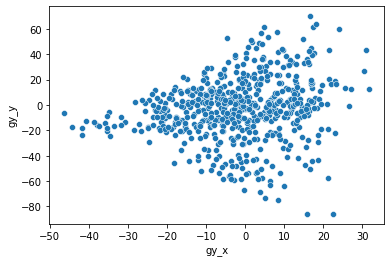

In [15]:
sns.scatterplot(x = train.iloc[:600,2], y= train.iloc[:600,3])
plt.show()
sns.scatterplot(x = train.iloc[:600,2], y= train.iloc[:600,4])
plt.show()
sns.scatterplot(x = train.iloc[:600,3], y= train.iloc[:600,4])
# plt.show()
# sns.scatterplot(x = train.iloc[:600,3], y= train.iloc[:600,5])
# plt.show()

# **데이터 살펴보기**

In [16]:
train

,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...
1874995,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [17]:
#id 별로 각각 600개의 데이터가 있음을 확인   
train['id'].value_counts()

KeyError: 'id'

In [18]:
#train_labels.csv 에서 id 가 수행한 동작과 그에 따른 label값을 확인
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


In [19]:
#id 별 동작들의 흐름 살펴보기
ex=train[train['id']==0]
ex.iloc[:,2:].plot()

KeyError: 'id'

In [20]:
ex=train[train['id']==1]
ex.iloc[:,2:].plot()

KeyError: 'id'

In [21]:
ex=train[train['id']==2]
ex.iloc[:,2:].plot()

KeyError: 'id'

In [24]:
train['id'] = all_df[['id']].iloc[:len(train),:]
train['time'] = all_df[['time']].iloc[:len(train),:]
test['id'] = all_df[['id']].iloc[len(train):,:]
test['time'] = all_df[['time']].iloc[len(train):,:]

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

<AxesSubplot:>

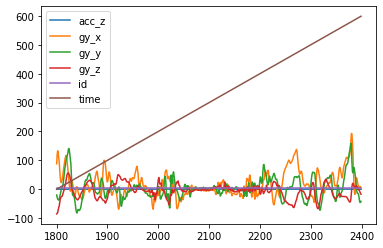

In [25]:
ex=train[train['id']==3]
ex.iloc[:,2:].plot()

In [26]:
#test'id'는 782개 
test['id'].nunique()

782

In [27]:
#782개의 id 별 동작 데이터를 활용해 각각의id가 어떤 동작인지를 분류하는 문제!!
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **라이브러리 불러오기**

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# **데이터 수정**

In [29]:
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [30]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

# **모델 학습 및 예측**

In [31]:
#가벼운 모델 생성
model = Sequential()
model.add(LSTM(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(X,y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 7s 262ms/step - loss: 3.3518 - accuracy: 0.4044 - val_loss: 2.7447 - val_accuracy: 0.4976
Epoch 2/30
20/20 [==============================] - 4s 220ms/step - loss: 2.7539 - accuracy: 0.4903 - val_loss: 2.7421 - val_accuracy: 0.4976
Epoch 3/30
20/20 [==============================] - 4s 218ms/step - loss: 2.6805 - accuracy: 0.5014 - val_loss: 2.7505 - val_accuracy: 0.4976
Epoch 4/30
20/20 [==============================] - 4s 216ms/step - loss: 2.8150 - accuracy: 0.4660 - val_loss: 2.7335 - val_accuracy: 0.4976
Epoch 5/30
20/20 [==============================] - 4s 211ms/step - loss: 2.7771 - accuracy: 0.4721 - val_loss: 2.7561 - val_accuracy: 0.4976
Epoch 6/30
20/20 [==============================] - 4s 214ms/step - loss: 2.7352 - accuracy: 0.4802 - val_loss: 2.7268 - val_accuracy: 0.4976
Epoch 7/30
20/20 [==============================] - 4s 214ms/step - loss: 2.6926 - accuracy: 0.4901 - val_loss: 2.7499 - val_accuracy: 0.4976
Epoch 

In [33]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [34]:
prediction=model.predict(test_X)

In [35]:
prediction.shape

(782, 61)

# **제출**

In [36]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
submission.iloc[:,1:]=prediction

In [38]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0.004159,0.006568,0.010887,0.005894,0.008471,0.019603,0.011083,0.005255,0.026462,...,0.024376,0.004757,0.008157,0.010309,0.016893,0.011787,0.014820,0.010177,0.007674,0.024116
1,3126,0.006925,0.004532,0.003897,0.008469,0.017983,0.028421,0.001040,0.001009,0.000807,...,0.010013,0.000275,0.006235,0.004965,0.023615,0.030720,0.013174,0.001281,0.021772,0.002621
2,3127,0.005669,0.006062,0.006964,0.010688,0.010469,0.034240,0.005552,0.003115,0.007537,...,0.031089,0.002022,0.008734,0.010030,0.030756,0.023586,0.018335,0.005970,0.014330,0.010485
3,3128,0.003805,0.006372,0.010266,0.005779,0.007326,0.018623,0.011828,0.005668,0.030038,...,0.025710,0.005344,0.007718,0.010470,0.017186,0.011156,0.014338,0.011175,0.006993,0.024108
4,3129,0.002452,0.006493,0.009580,0.004542,0.008324,0.011362,0.008063,0.006875,0.020226,...,0.011655,0.003232,0.004790,0.009892,0.013594,0.008319,0.009689,0.006977,0.006844,0.019079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.004800,0.006969,0.011608,0.006181,0.010716,0.021048,0.009358,0.004323,0.019986,...,0.022950,0.003685,0.008955,0.009777,0.016929,0.013540,0.015830,0.008365,0.009266,0.022013
778,3903,0.005788,0.005772,0.006352,0.011213,0.010746,0.035957,0.004831,0.002742,0.005970,...,0.030628,0.001691,0.008594,0.009612,0.031687,0.025368,0.018248,0.005223,0.015293,0.009054
779,3904,0.006465,0.003442,0.003034,0.008272,0.012719,0.033210,0.001035,0.000694,0.000772,...,0.012894,0.000260,0.005871,0.004360,0.022495,0.030312,0.012533,0.001251,0.018902,0.002307
780,3905,0.006464,0.003441,0.003033,0.008271,0.012718,0.033207,0.001034,0.000694,0.000771,...,0.012889,0.000260,0.005870,0.004358,0.022491,0.030311,0.012530,0.001250,0.018902,0.002305


In [39]:
submission.to_csv('baseline_submission.csv', index=False)